<a href="https://colab.research.google.com/github/Yasmine-ChemP/GMCtraining/blob/main/cp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import h5py
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential

import pydot
from IPython.display import SVG


import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow



In [ ]:
def load_dataset(path_to_train, path_to_test):
    train_dataset = h5py.File("/content/train_happy.h5")
    train_x = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])

    test_dataset = h5py.File("/content/test_happy.h5")
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])

    # y reshaped
    train_y = train_y.reshape((1, train_x.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))

    return train_x, train_y, test_x, test_y

In [ ]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset("train_happy.h5","test_happy.h5")

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


Image shape : (64, 64, 3)


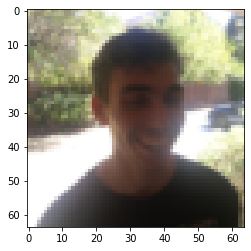

In [ ]:
# Sample image from dataset
print("Image shape :",X_train_orig[13].shape)
imshow(X_train_orig[13])

In [ ]:
model=Sequential([layers.Input(shape=(64,64,3)),
                           layers.Conv2D(32,(7,7), input_shape=(64,64,3), activation ='relu', padding='same'),
                           layers.BatchNormalization(axis = 3),
                           layers.MaxPooling2D((2, 2)),
                           layers.Flatten(),
                  layers.Dense(1, activation='sigmoid')])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 1)                 32769     
                                                                 
Total params: 37,633
Trainable params: 37,569
Non-traina

In [ ]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history_model = model.fit(X_train,
                        Y_train,
                        batch_size = 60,
                        epochs = 20)

Epoch 1/20
10/10 [==============================] - 8s 721ms/step - loss: 1.1383 - accuracy: 0.6450
Epoch 2/20
10/10 [==============================] - 8s 777ms/step - loss: 0.3726 - accuracy: 0.8250
Epoch 3/20
10/10 [==============================] - 4s 373ms/step - loss: 0.2077 - accuracy: 0.9283
Epoch 4/20
10/10 [==============================] - 4s 383ms/step - loss: 0.1717 - accuracy: 0.9367
Epoch 5/20
10/10 [==============================] - 4s 381ms/step - loss: 0.1681 - accuracy: 0.9367
Epoch 6/20
10/10 [==============================] - 4s 377ms/step - loss: 0.1827 - accuracy: 0.9117
Epoch 7/20
10/10 [==============================] - 4s 381ms/step - loss: 0.1556 - accuracy: 0.9517
Epoch 8/20
10/10 [==============================] - 4s 376ms/step - loss: 0.1027 - accuracy: 0.9567
Epoch 9/20
10/10 [==============================] - 4s 377ms/step - loss: 0.0684 - accuracy: 0.9817
Epoch 10/20
10/10 [==============================] - 4s 382ms/step - loss: 0.0619 - accuracy: 0.9817

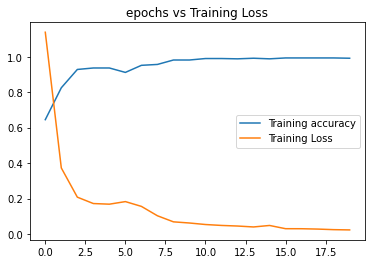

In [ ]:
train_accuracy = history_model.history['accuracy']
train_loss = history_model.history['loss']

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()

In [ ]:
#eveluate test set
evaluation = model.evaluate(X_test, Y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

5/5 [==============================] - 0s 62ms/step - loss: 0.3267 - accuracy: 0.9467
Test Accuracy : 0.947


In [ ]:
#prediction 
predictions = model.predict(X_test,verbose =0)


In [ ]:
#pred= np.round(predictions).astype(int)
pred= (predictions > 0.5).astype(np.int)
pred


In [ ]:
ConfMat = confusion_matrix(Y_test,pred)

print(ConfMat)
for i in range(10):
  print("predicted : {}, actual class : {} ".format((pred[i]),Y_test[i]))

[[60  6]
 [ 2 82]]
predicted : [1], actual class : [1] 
predicted : [1], actual class : [1] 
predicted : [1], actual class : [1] 
predicted : [1], actual class : [1] 
predicted : [1], actual class : [1] 
predicted : [1], actual class : [1] 
predicted : [1], actual class : [1] 
predicted : [0], actual class : [0] 
predicted : [1], actual class : [1] 
predicted : [0], actual class : [0] 


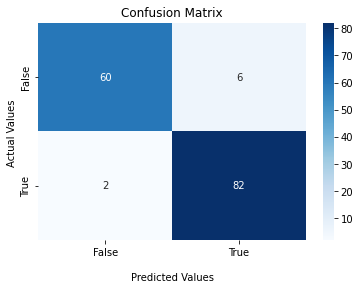

In [ ]:
#plot confusion matrix

ax = sns.heatmap(ConfMat, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

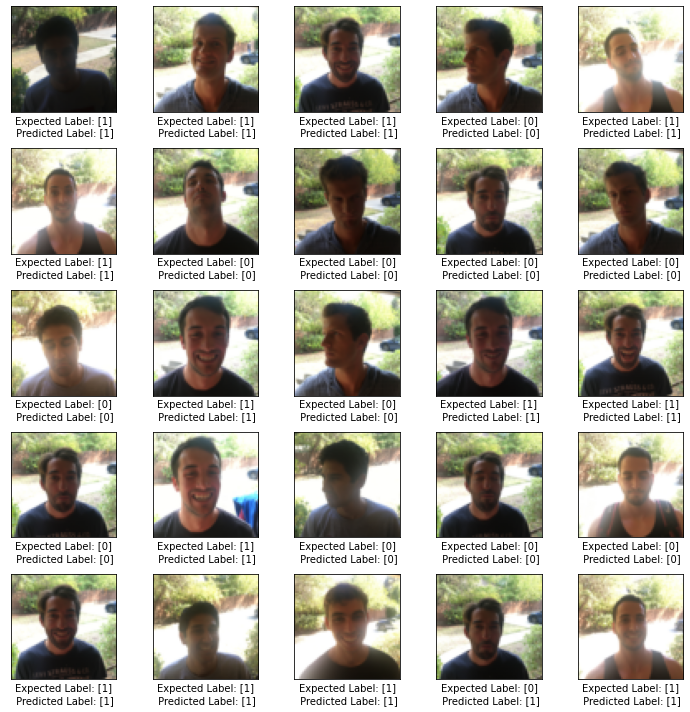

In [ ]:
#Display images with Predicted & expected labels (Happy-sad)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    
    img_index = np.random.randint(0, 150)
    plt.imshow(X_test[img_index])
    

    plt.xlabel("Expected Label: {}\n Predicted Label: {}".format(Y_test[img_index],pred[img_index]))

plt.tight_layout()
plt.show()